<a href="https://colab.research.google.com/github/thehydrowave/Adversarial-diffusion-distillation-pokemon/blob/main/Student_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Installation des dépendances

In [1]:
!pip install numpy==1.26.4 diffusers==0.25.1 transformers==4.37.2 accelerate==0.27.2 \
datasets==2.17.0 huggingface_hub==0.25.0 peft==0.7.1 fsspec==2023.6.0 \
torch==2.2.2 torchvision==0.17.2 pandas==2.2.2 timm --no-cache-dir --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 144.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 335.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 282.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 243.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 281.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 kB 258.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 277.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 376.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 235.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 332.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.6

## 2. Importation des modules

In [1]:
import numpy as np
import torch
import torch.nn as nn
import timm
from diffusers import StableDiffusionPipeline
from datasets import load_dataset
from torchvision import transforms
from PIL import Image
from torch.utils.data import DataLoader
from tqdm import tqdm
import copy
import matplotlib.pyplot as plt
from diffusers.models.attention_processor import LoRAAttnProcessor

/usr/local/lib/python3.11/dist-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/usr/local/lib/python3.11/dist-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


## 3. Initialisation du modèle Teacher

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
teacher = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16
).to(device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_token.py:90: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

## 4. Injection des modules LoRA

In [3]:
def inject_lora_modules(unet):
    print("Injection des modules LoRA...")
    cross_attention_dim = unet.config.cross_attention_dim
    attention_dims = {
        "mid_block": unet.config.block_out_channels[-1],
        "up_blocks.3": unet.config.block_out_channels[0],
        "up_blocks.2": unet.config.block_out_channels[1],
        "up_blocks.1": unet.config.block_out_channels[2],
        "up_blocks.0": unet.config.block_out_channels[3],
        "down_blocks.0": unet.config.block_out_channels[0],
        "down_blocks.1": unet.config.block_out_channels[1],
        "down_blocks.2": unet.config.block_out_channels[2],
        "down_blocks.3": unet.config.block_out_channels[3],
    }

    attn_processors = {}
    for name, processor in unet.attn_processors.items():
        for block_key in attention_dims:
            if name.startswith(block_key):
                hidden_size = attention_dims[block_key]
                is_cross_attention = name.endswith("attn2.processor")

                attn_processors[name] = LoRAAttnProcessor(
                    hidden_size=hidden_size,
                    cross_attention_dim=cross_attention_dim if is_cross_attention else None
                )
                break
        else:
            attn_processors[name] = processor

    unet.set_attn_processor(attn_processors)
    print(f"LoRA injecté dans {sum(isinstance(p, LoRAAttnProcessor) for p in attn_processors.values())} couches.")

## 5. Chargement des poids LoRA

In [4]:
def load_lora_weights_from_bin(unet, lora_path):
    print(f"Chargement des poids LoRA depuis : {lora_path}")
    lora_weights = torch.load(lora_path)
    updated = 0
    for full_key, module in unet.attn_processors.items():
        if hasattr(module, 'load_state_dict'):
            prefix = full_key + "."
            sub_state_dict = {k[len(prefix):]: v for k, v in lora_weights.items() if k.startswith(prefix)}
            if sub_state_dict:
                try:
                    module.load_state_dict(sub_state_dict, strict=False)
                    updated += 1
                except Exception as e:
                    print(f"Erreur pour {full_key} : {e}")
    print(f"{updated}/{len(unet.attn_processors)} modules LoRA mis à jour.")

## 6. Initialisation du modèle Student

In [5]:
inject_lora_modules(teacher.unet)
load_lora_weights_from_bin(teacher.unet, "./teacher_lora_weights.bin")

student = copy.deepcopy(teacher)
student.scheduler.set_timesteps(num_inference_steps=4)

Injection des modules LoRA...
LoRA injecté dans 0 couches.
Chargement des poids LoRA depuis : ./teacher_lora_weights.bin
32/32 modules LoRA mis à jour.


## 7. Discriminateur

In [6]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.backbone = timm.create_model('resnet18', pretrained=True, num_classes=1)

    def forward(self, x):
        return self.backbone(x)

discriminator = Discriminator().to(device)

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

## 8. Chargement du Dataset Naruto

In [7]:
dataset = load_dataset("lambdalabs/naruto-blip-captions", split="train")
dataset = dataset.select(range(128))

transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

def transform_example(example):
    image = example["image"].convert("RGB")
    example["pixel_values"] = transform(image)
    return example

dataset = dataset.map(transform_example)

def collate_fn(batch):
    pixel_values = torch.stack([torch.tensor(x["pixel_values"]) for x in batch])
    prompts = [x["text"] for x in batch]
    return pixel_values, prompts

train_dataloader = DataLoader(dataset, batch_size=1, shuffle=True, collate_fn=collate_fn)

Repo card metadata block was not found. Setting CardData to empty.


Generating train split:   0%|          | 0/1221 [00:00<?, ? examples/s]

Map:   0%|          | 0/128 [00:00<?, ? examples/s]

## 9. STUDENT QUI MARCHE TROUVEZ WHALAH

```
# Ce texte est au format code
```



In [15]:
from diffusers import DDIMScheduler

# 1. Initialisation du scheduler (à placer AVANT la boucle d'entraînement)
scheduler = DDIMScheduler.from_config(student.scheduler.config)
scheduler.set_timesteps(num_inference_steps=4)  # ou plus si souhaité

# 2. Initialisation une seule fois de l'optimizer_student AVANT la boucle
lora_params = []
for name, module in student.unet.attn_processors.items():
    if isinstance(module, LoRAAttnProcessor):
        module.to(device)
        for param in module.parameters():
            param.requires_grad = True
            lora_params.append(param)
optimizer_student = torch.optim.Adam(lora_params, lr=1e-5)

# 3. Entraînement
lambda_adv = 0.5
optimizer_disc = torch.optim.Adam(discriminator.parameters(), lr=1e-5)
adversarial_loss_fn = nn.BCEWithLogitsLoss()
mse_loss_fn = nn.MSELoss()

for epoch in range(2):
    loop = tqdm(train_dataloader, desc=f"Epoch {epoch}")
    for idx, (pixel_values, prompts) in enumerate(loop):
        pixel_values = pixel_values.to(device, dtype=torch.float16)
        batch_size = pixel_values.shape[0]

        # Encoder les prompts
        inputs = teacher.tokenizer(prompts, padding="max_length", truncation=True, return_tensors="pt").to(device)
        encoder_hidden_states = teacher.text_encoder(**inputs).last_hidden_state

        # Générer timestep t cohérent avec scheduler
        t = torch.randint(0, scheduler.config.num_train_timesteps, (batch_size,), device=device).long()

        # Encode les images en latents (teacher)
        latents = teacher.vae.encode(pixel_values).latent_dist.sample() * 0.18215
        noise = torch.randn_like(latents)
        x_t = scheduler.add_noise(latents, noise, t)
        target = noise

        # === Génération des images FAKE par le Student ===
        with torch.no_grad():
            student.unet.eval()
            noise_pred = student.unet(x_t, t, encoder_hidden_states).sample

            # Assurer cohérence des devices pour scheduler.step()
            noise_pred_cpu = noise_pred.cpu()
            t_cpu = t.cpu()
            x_t_cpu = x_t.cpu()

            latents_fake = scheduler.step(noise_pred_cpu, t_cpu, x_t_cpu).prev_sample.to(device)

            # Décodage
            gen_images = student.vae.decode(latents_fake.half()).sample
            gen_images = (gen_images / 2 + 0.5).clamp(0, 1)

        # === Entraînement du Discriminateur ===
        discriminator.train()
        discriminator.zero_grad()

        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        real_output = discriminator(pixel_values.float())
        fake_output = discriminator(gen_images.detach().float())

        d_loss_real = adversarial_loss_fn(real_output, real_labels)
        d_loss_fake = adversarial_loss_fn(fake_output, fake_labels)
        d_loss = (d_loss_real + d_loss_fake) / 2

        d_loss.backward()
        optimizer_disc.step()

        # === Entraînement du Student ===
        student.unet.train()
        optimizer_student.zero_grad()

        with torch.autocast(device_type='cuda', dtype=torch.float16):
            noise_pred = student.unet(x_t, t, encoder_hidden_states).sample
            loss_sds = mse_loss_fn(noise_pred, target)

            gen_output = discriminator(gen_images.float())
            loss_adv = adversarial_loss_fn(gen_output, real_labels)

            s_loss = loss_sds + lambda_adv * loss_adv

        s_loss.backward()
        optimizer_student.step()

        loop.set_postfix(d_loss=d_loss.item(), s_loss=s_loss.item(), sds=loss_sds.item())


Epoch 1: 100%|██████████| 128/128 [00:40<00:00,  3.14it/s, d_loss=0.666, s_loss=0.361, sds=0.0199]


  0%|          | 0/50 [00:00<?, ?it/s]

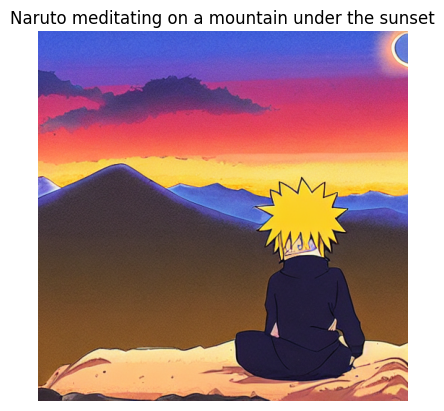

In [17]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt

prompt = "Naruto meditating on a mountain under the sunset"
generator = torch.manual_seed(42)

student.to("cuda")

# ✅ Met les sous-modules en mode évaluation
student.unet.eval()
student.vae.eval()
student.text_encoder.eval()
student.safety_checker = None  # (désactive le filtre NSFW si besoin)

with torch.autocast("cuda"):
    result = student(prompt=prompt, num_inference_steps=50, guidance_scale=7.5, generator=generator)

image = result.images[0]
plt.imshow(image)
plt.axis("off")
plt.title(prompt)
plt.show()


## 10. Génération et affichage de l'image

In [ ]:
# Désactiver le filtre NSFW
student.safety_checker = None


  0%|          | 0/50 [00:00<?, ?it/s]

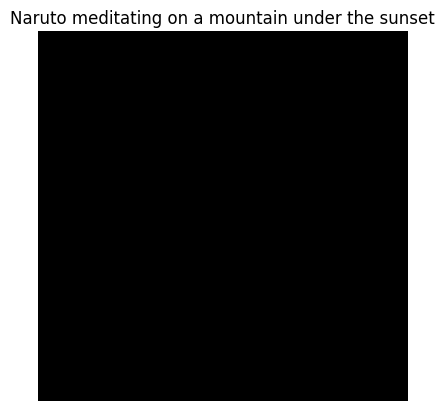

In [11]:

# Passage en mode évaluation
student.unet.eval()
student.vae.eval()
student.text_encoder.eval()

# VRAIE désactivation du filtre NSFW
student.safety_checker = lambda images, **kwargs: (images, [False] * len(images))

# Génération de l'image avec le modèle Student
prompt = "Naruto meditating on a mountain under the sunset"

# Assurez-vous que le modèle est bien préparé pour la génération
generator = torch.manual_seed(42)  # Pour la reproductibilité des résultats

# Génération de l'image avec StableDiffusionPipeline
with torch.autocast("cuda"):
    result = student(prompt=prompt, num_inference_steps=50, guidance_scale=7.5, generator=generator)

# Affichage de l'image générée
image = result.images[0]
plt.imshow(image)
plt.axis("off")
plt.title(prompt)
plt.show()

## 10. Génération et affichage de l'image (Teacher)

  0%|          | 0/50 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/diffusers/models/attention_processor.py:1871: FutureWarning: `LoRAAttnProcessor` is deprecated and will be removed in version 0.26.0. Make sure use AttnProcessor instead by settingLoRA layers to `self.{to_q,to_k,to_v,to_out[0]}.lora_layer` respectively. This will be done automatically when using `LoraLoaderMixin.load_lora_weights`
  deprecate(


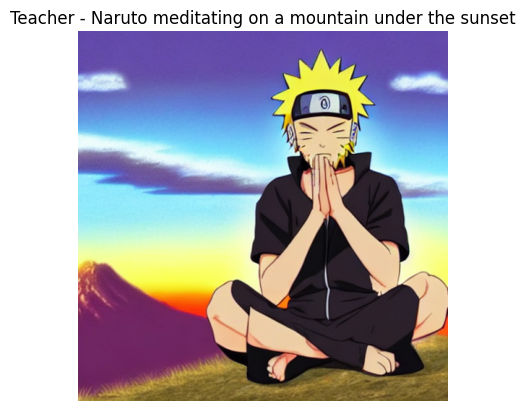

In [ ]:
teacher.safety_checker = None
teacher.to("cuda")
teacher.unet.eval()
teacher.text_encoder.eval()
teacher.vae.eval()

prompt = "Naruto meditating on a mountain under the sunset"

with torch.autocast("cuda"):
    result = teacher(prompt=prompt, num_inference_steps=50)

image = result.images[0]

from matplotlib import pyplot as plt
plt.imshow(image)
plt.axis("off")
plt.title("Teacher - " + prompt)
plt.show()


---------------------------------------------------------------------------